In [1]:
# Importing basic libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
from time import strptime
import calendar
import datetime
sb.set() # set the default Seaborn style for graphics
%matplotlib inline

In [2]:
# Reading in the cleaned csv data into the hotel_df dataframe
hotel_df = pd.read_csv("cleaned-hotel-dataset.csv",index_col=0).drop(columns ="index")

# **Machine Learning**
---
### **What is Machine Learning?**
Machine learning is a branch of artificial intelligence (AI) and computer science which focuses on the use of data and algorithms to imitate the way that humans learn, gradually improving its accuracy.



### **What Algorithms are We Using?**
In this project we will be using **7** different models:

1. Decision Tree Classifier


2. Random Forest Classifier


3. Gradient Boost Classifier


4. Cat Boost Classifier


5. XGBoost Classifier


6. AdaBoost Classifier


7. Logisitc Regression

### Pre-processing of Data
---

In this sub-section, we are doing some pre-processing to alter our data such that it is suitable to be fed into a machine learning algorithm.


Specifically, we will be:
- Using **OneHotEncoder** to encode categorical features as a one-hot numeric array. 


- Splitting the data using **train_test_split** into the train and test data.


- Create utility functions; `stat_train` and `stat_test` to test the accuracy of the different algorithms.

In [3]:
# Import OneHotEncoder to utilise categorical variable in the machine learning training
from sklearn.preprocessing import OneHotEncoder

In [4]:
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
hotel_cat = hotel_df[["market_segment","meal","deposit_type","customer_type","arrival_date_month",
                      "total_of_special_requests","arrival_day_of_week","useCompany"]]

ohe.fit(hotel_cat)
hotel_cat_ohe = pd.DataFrame(ohe.transform(hotel_cat).toarray(), 
                                  columns=ohe.get_feature_names(hotel_cat.columns))

# Check the encoded variables
hotel_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116962 entries, 0 to 116961
Data columns (total 47 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   market_segment_Aviation        116962 non-null  float64
 1   market_segment_Complementary   116962 non-null  float64
 2   market_segment_Corporate       116962 non-null  float64
 3   market_segment_Direct          116962 non-null  float64
 4   market_segment_Groups          116962 non-null  float64
 5   market_segment_Offline TA/TO   116962 non-null  float64
 6   market_segment_Online TA       116962 non-null  float64
 7   market_segment_Undefined       116962 non-null  float64
 8   meal_BB                        116962 non-null  float64
 9   meal_FB                        116962 non-null  float64
 10  meal_HB                        116962 non-null  float64
 11  meal_SC                        116962 non-null  float64
 12  meal_Undefined                

In [5]:
# Combining Numeric features with the OHE Categorical features
hotel_num = hotel_df[["lead_time","is_repeated_guest","previous_cancellations","adr",
                      "stays_in_week_nights","stays_in_weekend_nights"]]

hotel_res = hotel_df['is_canceled'] # Storring the result in a seprate dataframe
hotel_ohe = pd.concat([hotel_num, hotel_cat_ohe, hotel_res], 
                           sort = False, axis = 1).reindex(index=hotel_num.index)

# Check the final dataframe
hotel_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116962 entries, 0 to 116961
Data columns (total 54 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   lead_time                      116962 non-null  int64  
 1   is_repeated_guest              116962 non-null  int64  
 2   previous_cancellations         116962 non-null  int64  
 3   adr                            116962 non-null  float64
 4   stays_in_week_nights           116962 non-null  int64  
 5   stays_in_weekend_nights        116962 non-null  int64  
 6   market_segment_Aviation        116962 non-null  float64
 7   market_segment_Complementary   116962 non-null  float64
 8   market_segment_Corporate       116962 non-null  float64
 9   market_segment_Direct          116962 non-null  float64
 10  market_segment_Groups          116962 non-null  float64
 11  market_segment_Offline TA/TO   116962 non-null  float64
 12  market_segment_Online TA      

In [6]:
# Import train test split library to split data into training and testing sets
from sklearn.model_selection import train_test_split

In [7]:
# Extract Response and Predictors
y = pd.DataFrame(hotel_ohe['is_canceled'])
X = pd.DataFrame(hotel_ohe.drop('is_canceled', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [8]:
# Import confusion matrix which will be used to test the accuracy of the different ML algorithm
from sklearn.metrics import confusion_matrix

In [9]:
# Function stat_train, will be used to test for the accuracy of the algorithm on TRAIN data set.
def stat_train(a):
    y_train_pred = a.predict(X_train)

    # Print the Classification Accuracy
    print("Train Data")
    print("Accuracy  :\t", a.score(X_train, y_train))
    print()

    # Print the Accuracy Measures from the Confusion Matrix
    cmTrain = confusion_matrix(y_train, y_train_pred)
    tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
    fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
    tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
    fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

    print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
    print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
    print()

    print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
    print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

    # Plot the two-way Confusion Matrix
    sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18},
              cmap='coolwarm')

In [10]:
# Function stat_test, will be used to test for the accuracy of the algorithm on TEST data set.
def stat_test(a):  

    # Predict the Response corresponding to Predictors
    y_test_pred = a.predict(X_test)

    # Print the Classification Accuracy
    print("Test Data")
    print("Accuracy  :\t", a.score(X_test, y_test))
    print()

    # Print the Accuracy Measures from the Confusion Matrix
    cmTest = confusion_matrix(y_test, y_test_pred)
    tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
    fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
    tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
    fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

    print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
    print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
    print()

    print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
    print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

    # Plot the two-way Confusion Matrix
    sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18},
              cmap='coolwarm')

### 1- Decision Tree Classifier

In [11]:
# Import Decision Tree Classifier model from sklearn
from sklearn.tree import DecisionTreeClassifier

In [12]:
# Creating the decision tree model and fitting it into the train data set
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

Train Data
Accuracy  :	 0.9898623477825412

TPR Train :	 0.9801552502517132
TNR Train :	 0.9957129433873619

FPR Train :	 0.004287056612638008
FNR Train :	 0.019844749748286726


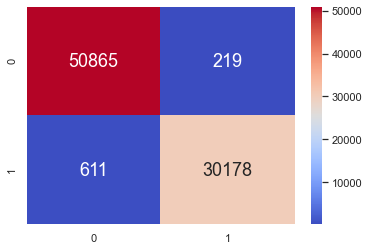

In [13]:
# Testing for accuracy on the train data set
stat_train(dtc)

Test Data
Accuracy  :	 0.8038986576989939

TPR Test :	 0.7520510483135825
TNR Test :	 0.8350285062713797

FPR Test :	 0.1649714937286203
FNR Test :	 0.2479489516864175


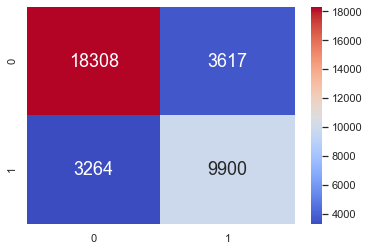

In [14]:
# Testing for accuracy on the test data set
stat_test(dtc)

In [15]:
# Import library to visualise what a decision tree looks like
from sklearn.tree import plot_tree

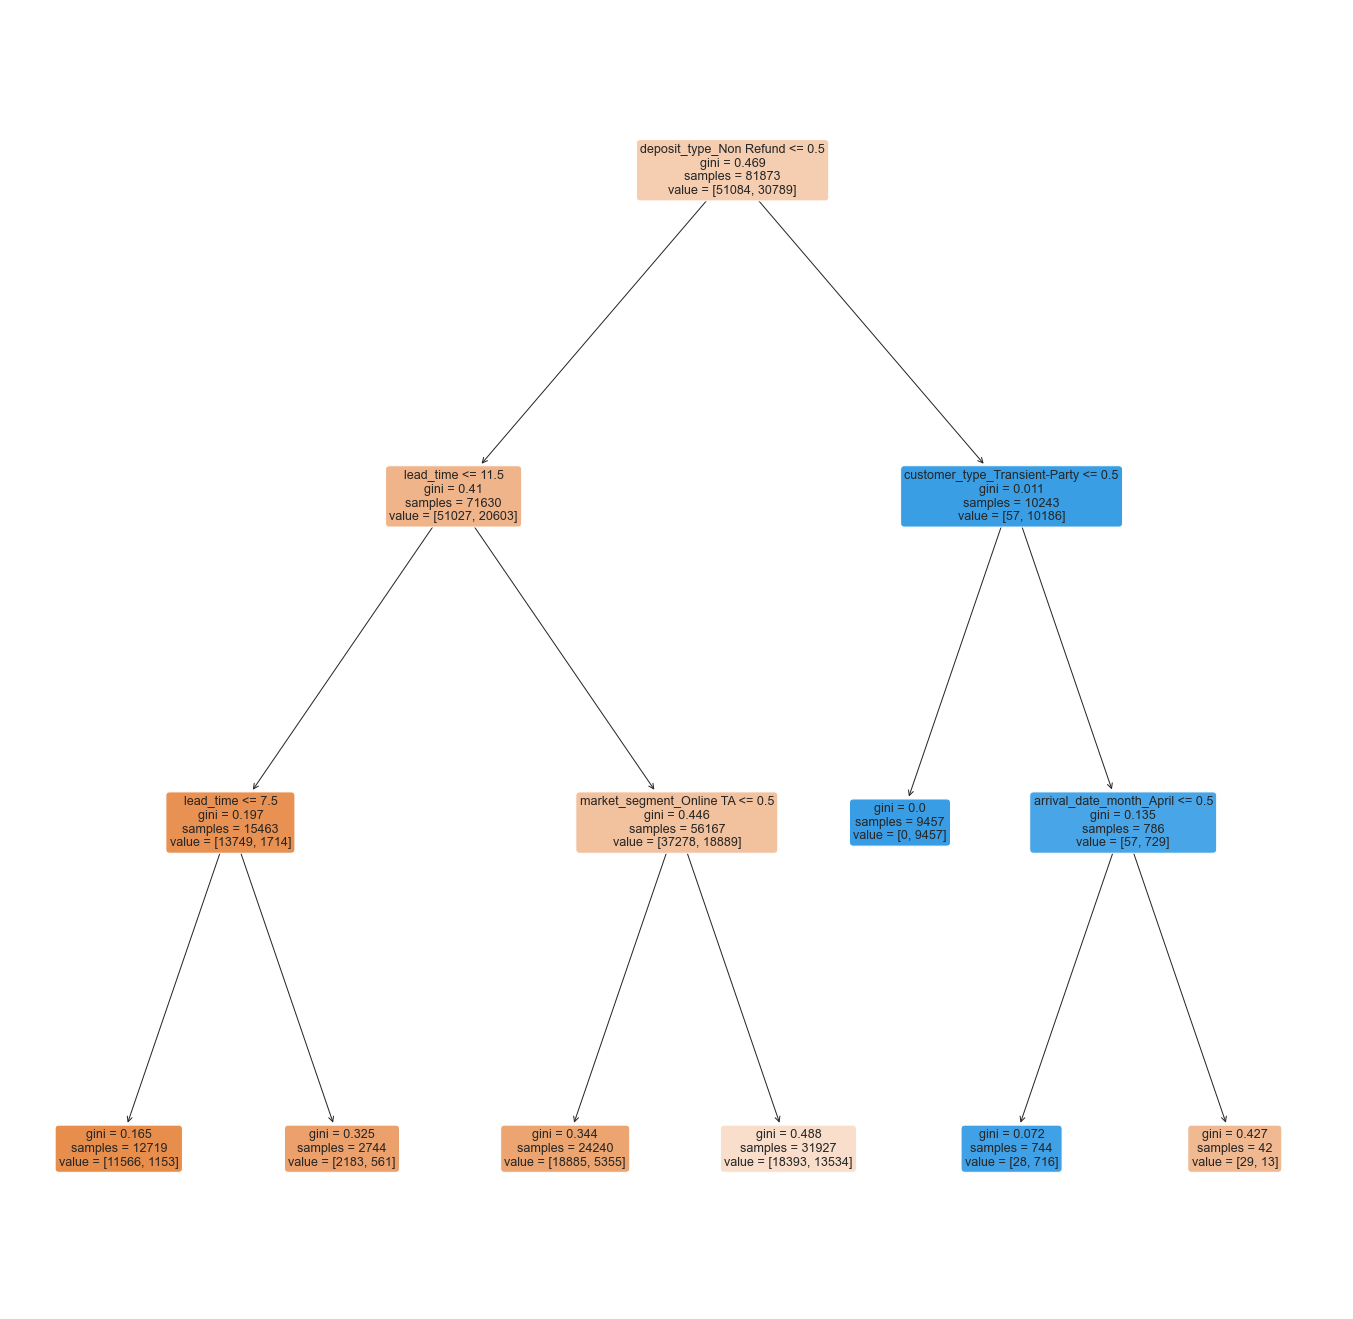

In [17]:
# Creating a limited depth decision tree
dtc1 = DecisionTreeClassifier(max_depth = 3)
dtc1.fit(X_train, y_train)

# Plotting what a decision tree would look like with limited depth
f = plt.figure(figsize=(24,24))
plot_tree(dtc1, filled=True, rounded=True, feature_names = X_train.columns)
plt.show()

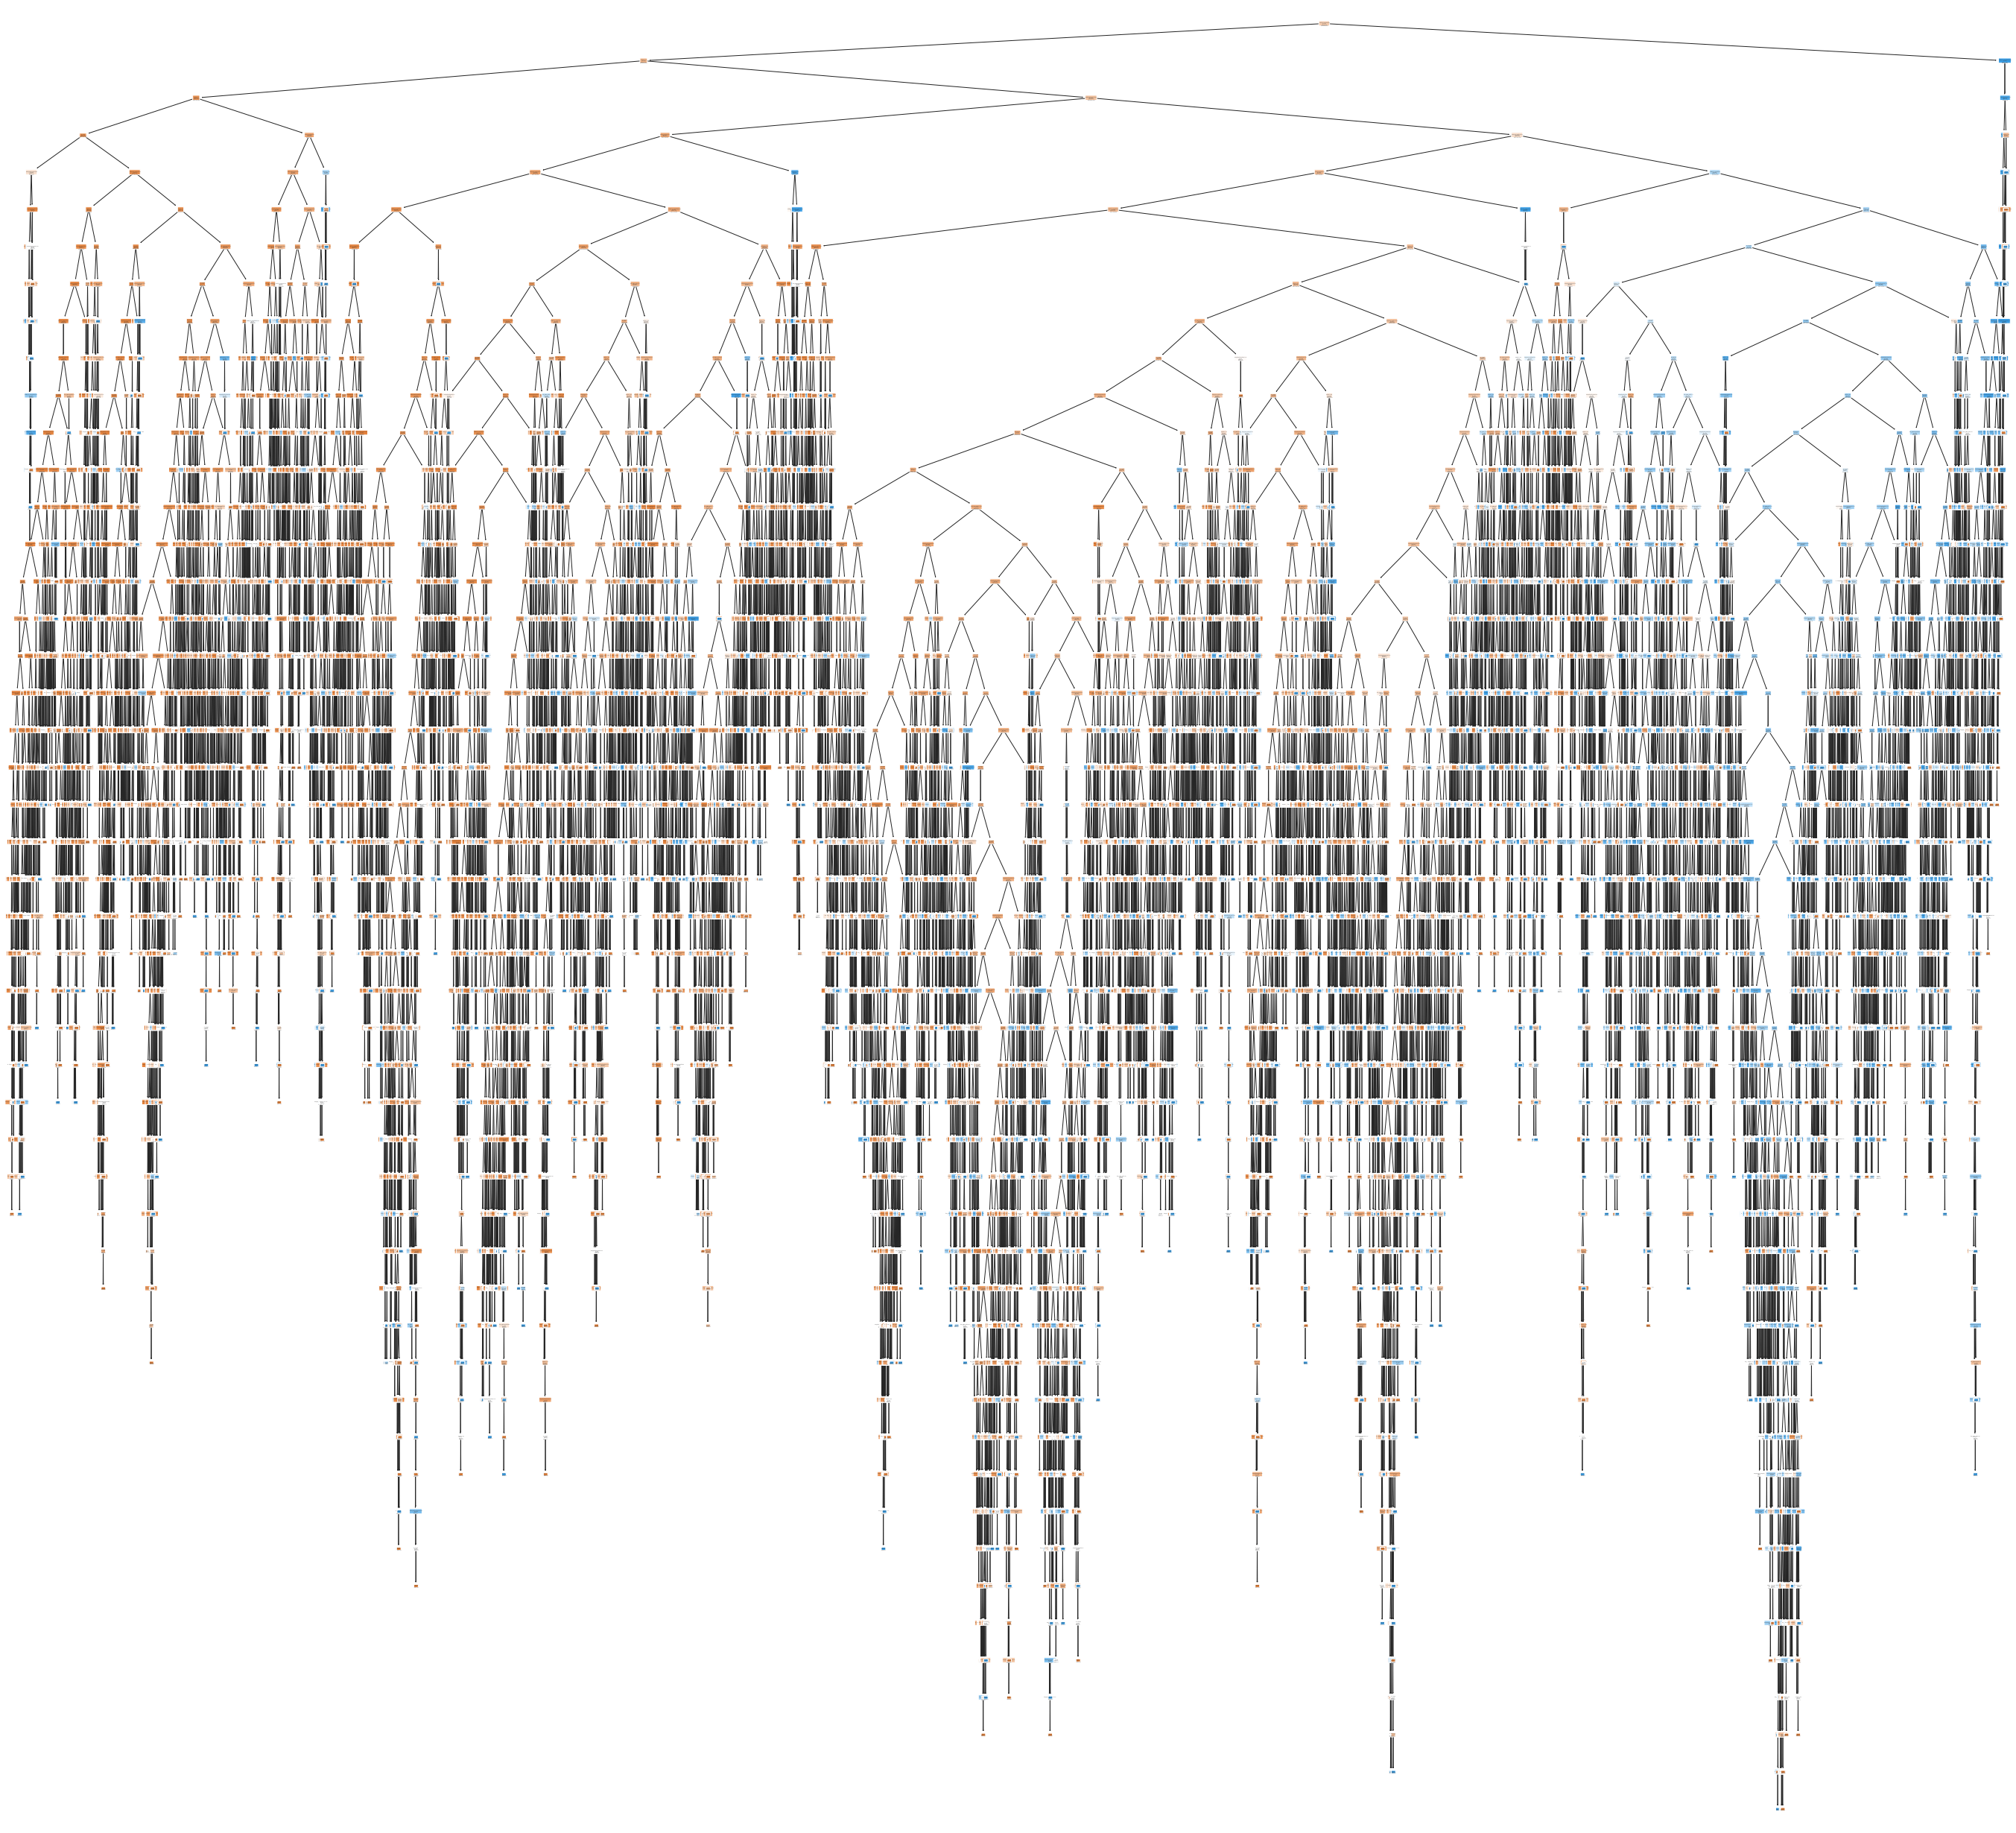

In [18]:
# Full decision tree
f = plt.figure(figsize=(48,45))
plot_tree(dtc, filled=True, rounded=True, feature_names = X_train.columns)
plt.show()

#### Conclusion: The Decision Tree is fairly accurate, however, the False Positive Rate can be improved.
----

### 2- Random Forest Classifier

In [19]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

In [20]:
# Create the Random Forest object
rforest = RandomForestClassifier() 

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.is_canceled.ravel())

RandomForestClassifier()

Train Data
Accuracy  :	 0.9898379197049089

TPR Train :	 0.9823638312384293
TNR Train :	 0.9943426513193955

FPR Train :	 0.005657348680604494
FNR Train :	 0.01763616876157069


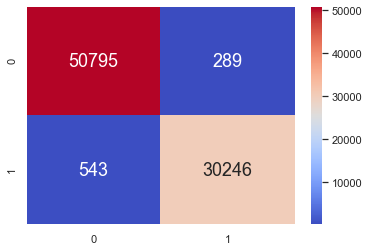

In [21]:
# Testing for accuracy on the train data set
stat_train(rforest)

Test Data
Accuracy  :	 0.8482145401692838

TPR Test :	 0.7412640534791857
TNR Test :	 0.9124287343215507

FPR Test :	 0.08757126567844926
FNR Test :	 0.25873594652081433


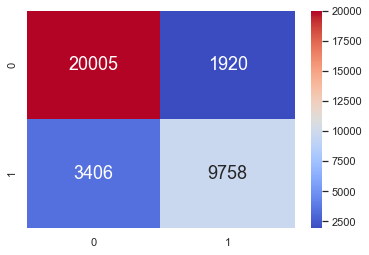

In [22]:
# Testing for accuracy on the test data set
stat_test(rforest)

#### Conclusion: The Random Forest Classifier provides a much better accuracy and a lower False Positive Rate.
----

### 3- Gradient Boost Classifier

In [23]:
# Import Gradient Boost Classifier from sklearn
from sklearn.ensemble import GradientBoostingClassifier

In [24]:
# Creating the cat boost model and fitting it into the train data set
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train.is_canceled.ravel())

GradientBoostingClassifier()

Train Data
Accuracy  :	 0.8083128748183162

TPR Train :	 0.6170385527298711
TNR Train :	 0.9235964294103829

FPR Train :	 0.0764035705896171
FNR Train :	 0.38296144727012893


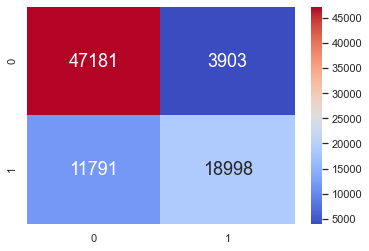

In [25]:
# Testing for accuracy on the train data set
stat_train(gb)

Test Data
Accuracy  :	 0.8079740089486733

TPR Test :	 0.6152385293223944
TNR Test :	 0.9236944127708095

FPR Test :	 0.07630558722919042
FNR Test :	 0.3847614706776056


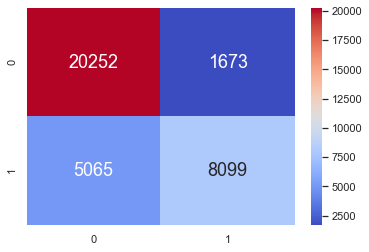

In [26]:
# Testing for accuracy on the test data set
stat_test(gb)

#### Conclusion: Similar accuracy to Decision Tree but high False Negative Rate
----

### 4- Cat Boost Classifier

In [27]:
# Import Cat Boost Classifier from catboost (Need to install the package first!!!)
# !pip install catboost
from catboost import CatBoostClassifier

In [28]:
# Creating the cat boost model and fitting it into the train data set
cat = CatBoostClassifier(iterations=500)
cat.fit(X_train, y_train)

Learning rate set to 0.127611
0:	learn: 0.5950558	total: 70ms	remaining: 34.9s
1:	learn: 0.5394899	total: 75.1ms	remaining: 18.7s
2:	learn: 0.5054108	total: 80.3ms	remaining: 13.3s
3:	learn: 0.4840453	total: 87ms	remaining: 10.8s
4:	learn: 0.4705742	total: 93.9ms	remaining: 9.29s
5:	learn: 0.4605359	total: 101ms	remaining: 8.31s
6:	learn: 0.4532808	total: 108ms	remaining: 7.57s
7:	learn: 0.4469257	total: 114ms	remaining: 7.02s
8:	learn: 0.4420394	total: 121ms	remaining: 6.62s
9:	learn: 0.4373818	total: 129ms	remaining: 6.32s
10:	learn: 0.4346452	total: 136ms	remaining: 6.06s
11:	learn: 0.4318763	total: 144ms	remaining: 5.84s
12:	learn: 0.4301517	total: 151ms	remaining: 5.64s
13:	learn: 0.4279552	total: 158ms	remaining: 5.47s
14:	learn: 0.4264618	total: 165ms	remaining: 5.33s
15:	learn: 0.4253160	total: 172ms	remaining: 5.21s
16:	learn: 0.4244806	total: 179ms	remaining: 5.09s
17:	learn: 0.4234451	total: 186ms	remaining: 4.99s
18:	learn: 0.4224177	total: 194ms	remaining: 4.9s
19:	learn: 

183:	learn: 0.3778938	total: 1.39s	remaining: 2.39s
184:	learn: 0.3778180	total: 1.4s	remaining: 2.38s
185:	learn: 0.3777910	total: 1.41s	remaining: 2.38s
186:	learn: 0.3776303	total: 1.42s	remaining: 2.37s
187:	learn: 0.3775610	total: 1.42s	remaining: 2.36s
188:	learn: 0.3772066	total: 1.43s	remaining: 2.35s
189:	learn: 0.3770651	total: 1.44s	remaining: 2.34s
190:	learn: 0.3768796	total: 1.44s	remaining: 2.34s
191:	learn: 0.3767438	total: 1.45s	remaining: 2.33s
192:	learn: 0.3766292	total: 1.46s	remaining: 2.32s
193:	learn: 0.3764775	total: 1.47s	remaining: 2.31s
194:	learn: 0.3763929	total: 1.47s	remaining: 2.3s
195:	learn: 0.3762101	total: 1.48s	remaining: 2.3s
196:	learn: 0.3761380	total: 1.49s	remaining: 2.29s
197:	learn: 0.3760015	total: 1.5s	remaining: 2.28s
198:	learn: 0.3758563	total: 1.5s	remaining: 2.27s
199:	learn: 0.3756975	total: 1.51s	remaining: 2.26s
200:	learn: 0.3756029	total: 1.52s	remaining: 2.25s
201:	learn: 0.3754834	total: 1.52s	remaining: 2.25s
202:	learn: 0.375

351:	learn: 0.3580615	total: 2.6s	remaining: 1.09s
352:	learn: 0.3578829	total: 2.61s	remaining: 1.09s
353:	learn: 0.3577546	total: 2.62s	remaining: 1.08s
354:	learn: 0.3576766	total: 2.63s	remaining: 1.07s
355:	learn: 0.3575947	total: 2.63s	remaining: 1.06s
356:	learn: 0.3574405	total: 2.64s	remaining: 1.06s
357:	learn: 0.3573638	total: 2.65s	remaining: 1.05s
358:	learn: 0.3572696	total: 2.65s	remaining: 1.04s
359:	learn: 0.3571491	total: 2.66s	remaining: 1.03s
360:	learn: 0.3570182	total: 2.67s	remaining: 1.03s
361:	learn: 0.3569265	total: 2.67s	remaining: 1.02s
362:	learn: 0.3567795	total: 2.68s	remaining: 1.01s
363:	learn: 0.3566669	total: 2.69s	remaining: 1s
364:	learn: 0.3566144	total: 2.7s	remaining: 998ms
365:	learn: 0.3564451	total: 2.71s	remaining: 991ms
366:	learn: 0.3563271	total: 2.71s	remaining: 983ms
367:	learn: 0.3562334	total: 2.72s	remaining: 976ms
368:	learn: 0.3560998	total: 2.73s	remaining: 968ms
369:	learn: 0.3559833	total: 2.73s	remaining: 961ms
370:	learn: 0.355

Train Data
Accuracy  :	 0.8446618543353731

TPR Train :	 0.69531326122966
TNR Train :	 0.9346762195599405

FPR Train :	 0.06532378044005951
FNR Train :	 0.3046867387703401


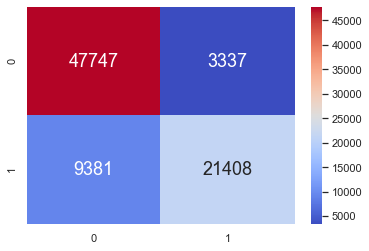

In [29]:
# Testing for accuracy on the train data set
stat_train(cat)

Test Data
Accuracy  :	 0.8328251018837812

TPR Test :	 0.6773776967487086
TNR Test :	 0.926157354618016

FPR Test :	 0.07384264538198404
FNR Test :	 0.3226223032512914


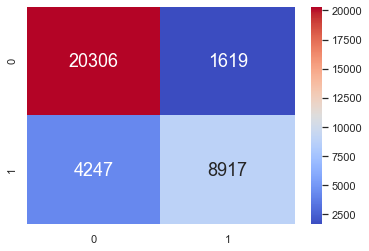

In [30]:
# Testing for accuracy on the test data set
stat_test(cat)

#### Conclusion: A better accuracy than the Decision Tree, however, the False Negative Rate is higher.
----

### 5- XGBoost Classifier

In [31]:
# Import XGBClassifier Classifier from xgboost (Need to install the package first!!!)
# !pip install xgboost
from xgboost import XGBClassifier

In [32]:
# Creating the XGB boost model and fitting it into the train data set
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

Train Data
Accuracy  :	 0.8198795695772721

TPR Train :	 0.6363636363636364
TNR Train :	 0.9304870409521573

FPR Train :	 0.06951295904784277
FNR Train :	 0.36363636363636365


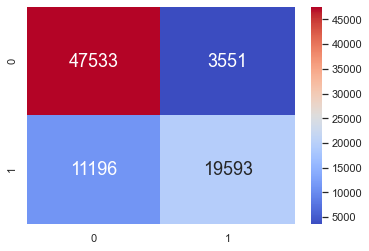

In [33]:
# Testing for accuracy on the train data set
stat_train(xgb)

Test Data
Accuracy  :	 0.8170651771210351

TPR Test :	 0.6325584928593133
TNR Test :	 0.9278449258836944

FPR Test :	 0.07215507411630559
FNR Test :	 0.36744150714068674


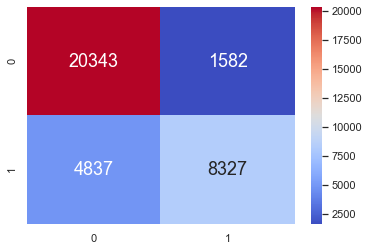

In [34]:
# Testing for accuracy on the test data set
stat_test(xgb)

#### Conclusion: Slightly better accuracy than Decision Tree but high False Negative Rate
----

### 6- AdaBoost Classifier

In [35]:
#import from sklearn the adaboost model
from sklearn.ensemble import AdaBoostClassifier

In [36]:
# Creating the AdaBoost model and fitting it into the train data set
ada = AdaBoostClassifier()
ada.fit(X_train, y_train.is_canceled.ravel())

AdaBoostClassifier()

Train Data
Accuracy  :	 0.805015084337938

TPR Train :	 0.6131085777388028
TNR Train :	 0.9206796648657114

FPR Train :	 0.07932033513428863
FNR Train :	 0.38689142226119716


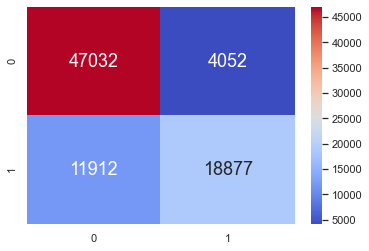

In [37]:
# Testing for accuracy on the train data set
stat_train(ada)

Test Data
Accuracy  :	 0.8058080880047879

TPR Test :	 0.6129595867517472
TNR Test :	 0.9215963511972634

FPR Test :	 0.0784036488027366
FNR Test :	 0.38704041324825283


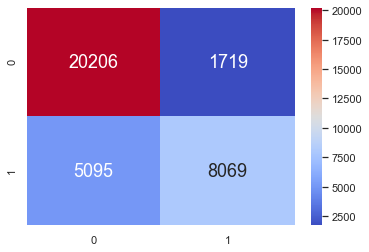

In [38]:
# Testing for accuracy on the test data set
stat_test(ada)

#### Conclusion: Slightly lower accuracy but too high False Negative Rate
----

### 7- Logistic Regression

In [39]:
# Import logisitc regression Classifier from lightgbm
from sklearn.linear_model import LogisticRegression

In [40]:
# Creating the logisitc regression model and fitting it into the train data set
lr = LogisticRegression(max_iter=400000)
lr.fit(X_train, y_train.is_canceled.ravel())

LogisticRegression(max_iter=400000)

Train Data
Accuracy  :	 0.7976500189317601

TPR Train :	 0.5867355224268408
TNR Train :	 0.9247709654686399

FPR Train :	 0.07522903453136011
FNR Train :	 0.41326447757315926


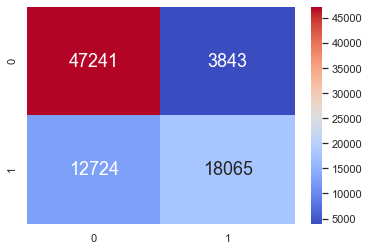

In [41]:
# Testing for accuracy on the train data set
stat_train(lr)

Test Data
Accuracy  :	 0.7986548490980079

TPR Test :	 0.5889547250075965
TNR Test :	 0.9245610034207525

FPR Test :	 0.07543899657924744
FNR Test :	 0.4110452749924035


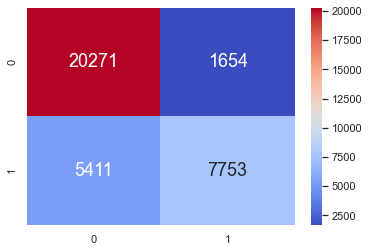

In [42]:
# Testing for accuracy on the test data set
stat_test(lr)

#### Conclusion: Slightly lower accuracy, but main issue is that the False Negative Rate is too high.
----

# **Conclusion**
---
### **What Machine Learning Model did We Choose?**
We decided to pick **Random Forest** as our model of choice. This is because it has:
- Highest accuracy of ~84% on test data.
- Relatively low FPR of ~8%.

Random forests consist of multiple single decision trees each based on a random sample of the training data. They are typically more accurate than single decision trees. The decision boundary becomes more accurate and stable as more trees are added.  

After selecting Random Forest as our model of choice, we decided to look into the features that the model priotised. Here is our findings:

In [43]:
importance = rforest.feature_importances_
sorted_idx = rforest.feature_importances_.argsort()
sort = np.flip(sorted_idx)

# Printing out the top 10 most important variables
for a in (sort[:10]):
    print('Feature: %-40s Score: %0.5f' % (hotel_ohe.columns[a],importance[a]))

Feature: lead_time                                Score: 0.21762
Feature: adr                                      Score: 0.17460
Feature: deposit_type_Non Refund                  Score: 0.08713
Feature: deposit_type_No Deposit                  Score: 0.07807
Feature: stays_in_week_nights                     Score: 0.05507
Feature: previous_cancellations                   Score: 0.04001
Feature: total_of_special_requests_0              Score: 0.03627
Feature: stays_in_weekend_nights                  Score: 0.02861
Feature: market_segment_Online TA                 Score: 0.02591
Feature: market_segment_Groups                    Score: 0.01784


#### Remarks: The top 10 most important variables coincides with our findings in our EDA. In our EDA, these variables have demonstrated to have some significance in affecting cancellation rate.
---

### **What Have We Done?**
In this project we have:
- Cleaned raw data to be utilised later on in EDA.


- Performed EDA using different tools to find out which variables are important / relevant.


- Utilised different Machine Learning algorithms to find out which is the most suitable. 


In conclusion, our model has managed to attain a relatively high accuracy of ~**85%**. This allows hotels to have a relatively high confidence in predicting which customer will cancel their reservations, thus, allowing them to maximise utilisation rates.


#### Thank you for taking the time to read through our code. We hope you had as much fun reading as we did doing this project! 